Big_Mart_Sales_Prediction

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Train Data 

In [232]:
df = pd.read_csv('train_v9rqX0R.csv')

In [233]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Check for Null Values

In [234]:
df.shape

(8523, 12)

In [235]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [236]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [237]:
df['Item_Weight'].nunique()

415

In [238]:
df['Item_Weight'].mean()

12.857645184136183

In [239]:
df['Item_Weight'].mode()[0]

12.15

In [240]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [241]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [242]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlier Checking

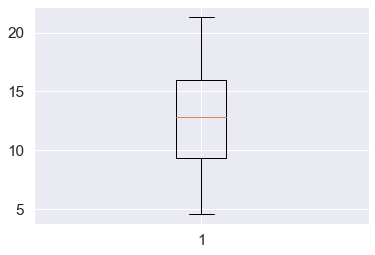

In [243]:
plt.boxplot(df['Item_Weight'])
plt.show()

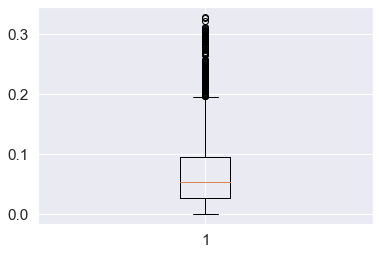

In [244]:
plt.boxplot(df['Item_Visibility'])
plt.show()

In [245]:
df['Item_Visibility'].quantile(.99)

0.2262488690400001

In [246]:
Q1,Q3 = np.percentile(df['Item_Visibility'],[25,75])
IQR = Q3-Q1

In [247]:
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

In [248]:
min,max,IQR

(-0.07440424500000001, 0.195979015, 0.067595815)

In [249]:
x=df['Item_Visibility'] > 0.195979015

In [250]:
x.value_counts()

False    8379
True      144
Name: Item_Visibility, dtype: int64

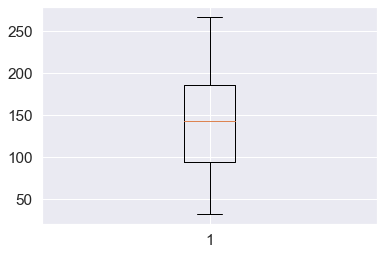

In [251]:
plt.boxplot(df['Item_MRP'])
plt.show()

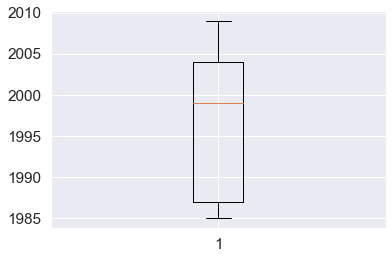

In [252]:
plt.boxplot(df['Outlet_Establishment_Year'])
plt.show()

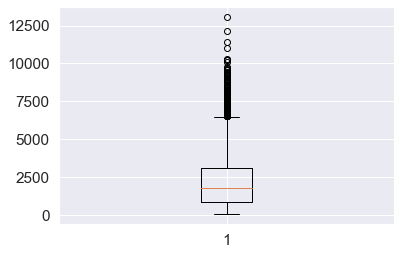

In [253]:
plt.boxplot(df['Item_Outlet_Sales'])
plt.show()

Encoding

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [255]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [256]:
df.shape

(8523, 12)

In [257]:
df[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales']].nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [258]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
#req_cols = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [259]:
#X = pd.DataFrame(df[req_cols])


In [260]:
#y = X.apply(Encode.fit_transform)

In [261]:
df_new = df

In [262]:
df_new['Item_Identifier'] = encode.fit_transform(df_new['Item_Identifier'])
df_new['Item_Fat_Content'] = encode.fit_transform(df_new['Item_Fat_Content'])
df_new['Item_Type'] = encode.fit_transform(df_new['Item_Type'])
df_new['Outlet_Identifier'] = encode.fit_transform(df_new['Outlet_Identifier'])
df_new['Outlet_Size'] = encode.fit_transform(df_new['Outlet_Size'])
df_new['Outlet_Location_Type'] = encode.fit_transform(df_new['Outlet_Location_Type'])
df_new['Outlet_Type'] = encode.fit_transform(df_new['Outlet_Type'])

In [263]:
df_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [264]:
df_new['Item_Identifier'].nunique()

1559

Standardization

In [265]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [266]:
df_scale = pd.DataFrame(scalar.fit_transform(df_new), columns=df.columns)

In [267]:
df_scale.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.388514,-0.841872,-0.572844,-0.970732,-0.766479,1.747454,1.507813,0.139541,-0.744458,-1.369334,-0.252658,0.910601
1,-1.717991,-1.641706,0.978092,-0.908111,1.608963,-1.489023,-0.607071,1.334103,-0.744458,1.091569,1.002972,-1.018440
2,-0.262057,1.098554,-0.572844,-0.956917,0.658786,0.010040,1.507813,0.139541,-0.744458,-1.369334,-0.252658,-0.049238
3,0.759769,1.500838,0.978092,-1.281758,-0.291391,0.660050,-1.664513,0.020085,1.277535,1.091569,-1.508289,-0.849103
4,1.151580,-0.929428,-0.572844,-1.281758,0.421242,-1.399220,-1.312032,-1.293934,-1.755454,1.091569,-0.252658,-0.695373


Correlation


In [268]:
df_new.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.000855,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.015096,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.004795,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.087796,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,0.000827,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,-0.002473,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.053224,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.470343,-0.089216,-0.122304,-0.049135
Outlet_Size,0.000855,-0.015096,-0.004795,0.087796,0.000827,-0.002473,0.053224,0.470343,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.290216,1.000000,0.467219,0.089367


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Item_Identifier'),
  Text(0, 1.5, 'Item_Weight'),
  Text(0, 2.5, 'Item_Fat_Content'),
  Text(0, 3.5, 'Item_Visibility'),
  Text(0, 4.5, 'Item_Type'),
  Text(0, 5.5, 'Item_MRP'),
  Text(0, 6.5, 'Outlet_Identifier'),
  Text(0, 7.5, 'Outlet_Establishment_Year'),
  Text(0, 8.5, 'Outlet_Size'),
  Text(0, 9.5, 'Outlet_Location_Type'),
  Text(0, 10.5, 'Outlet_Type'),
  Text(0, 11.5, 'Item_Outlet_Sales')])

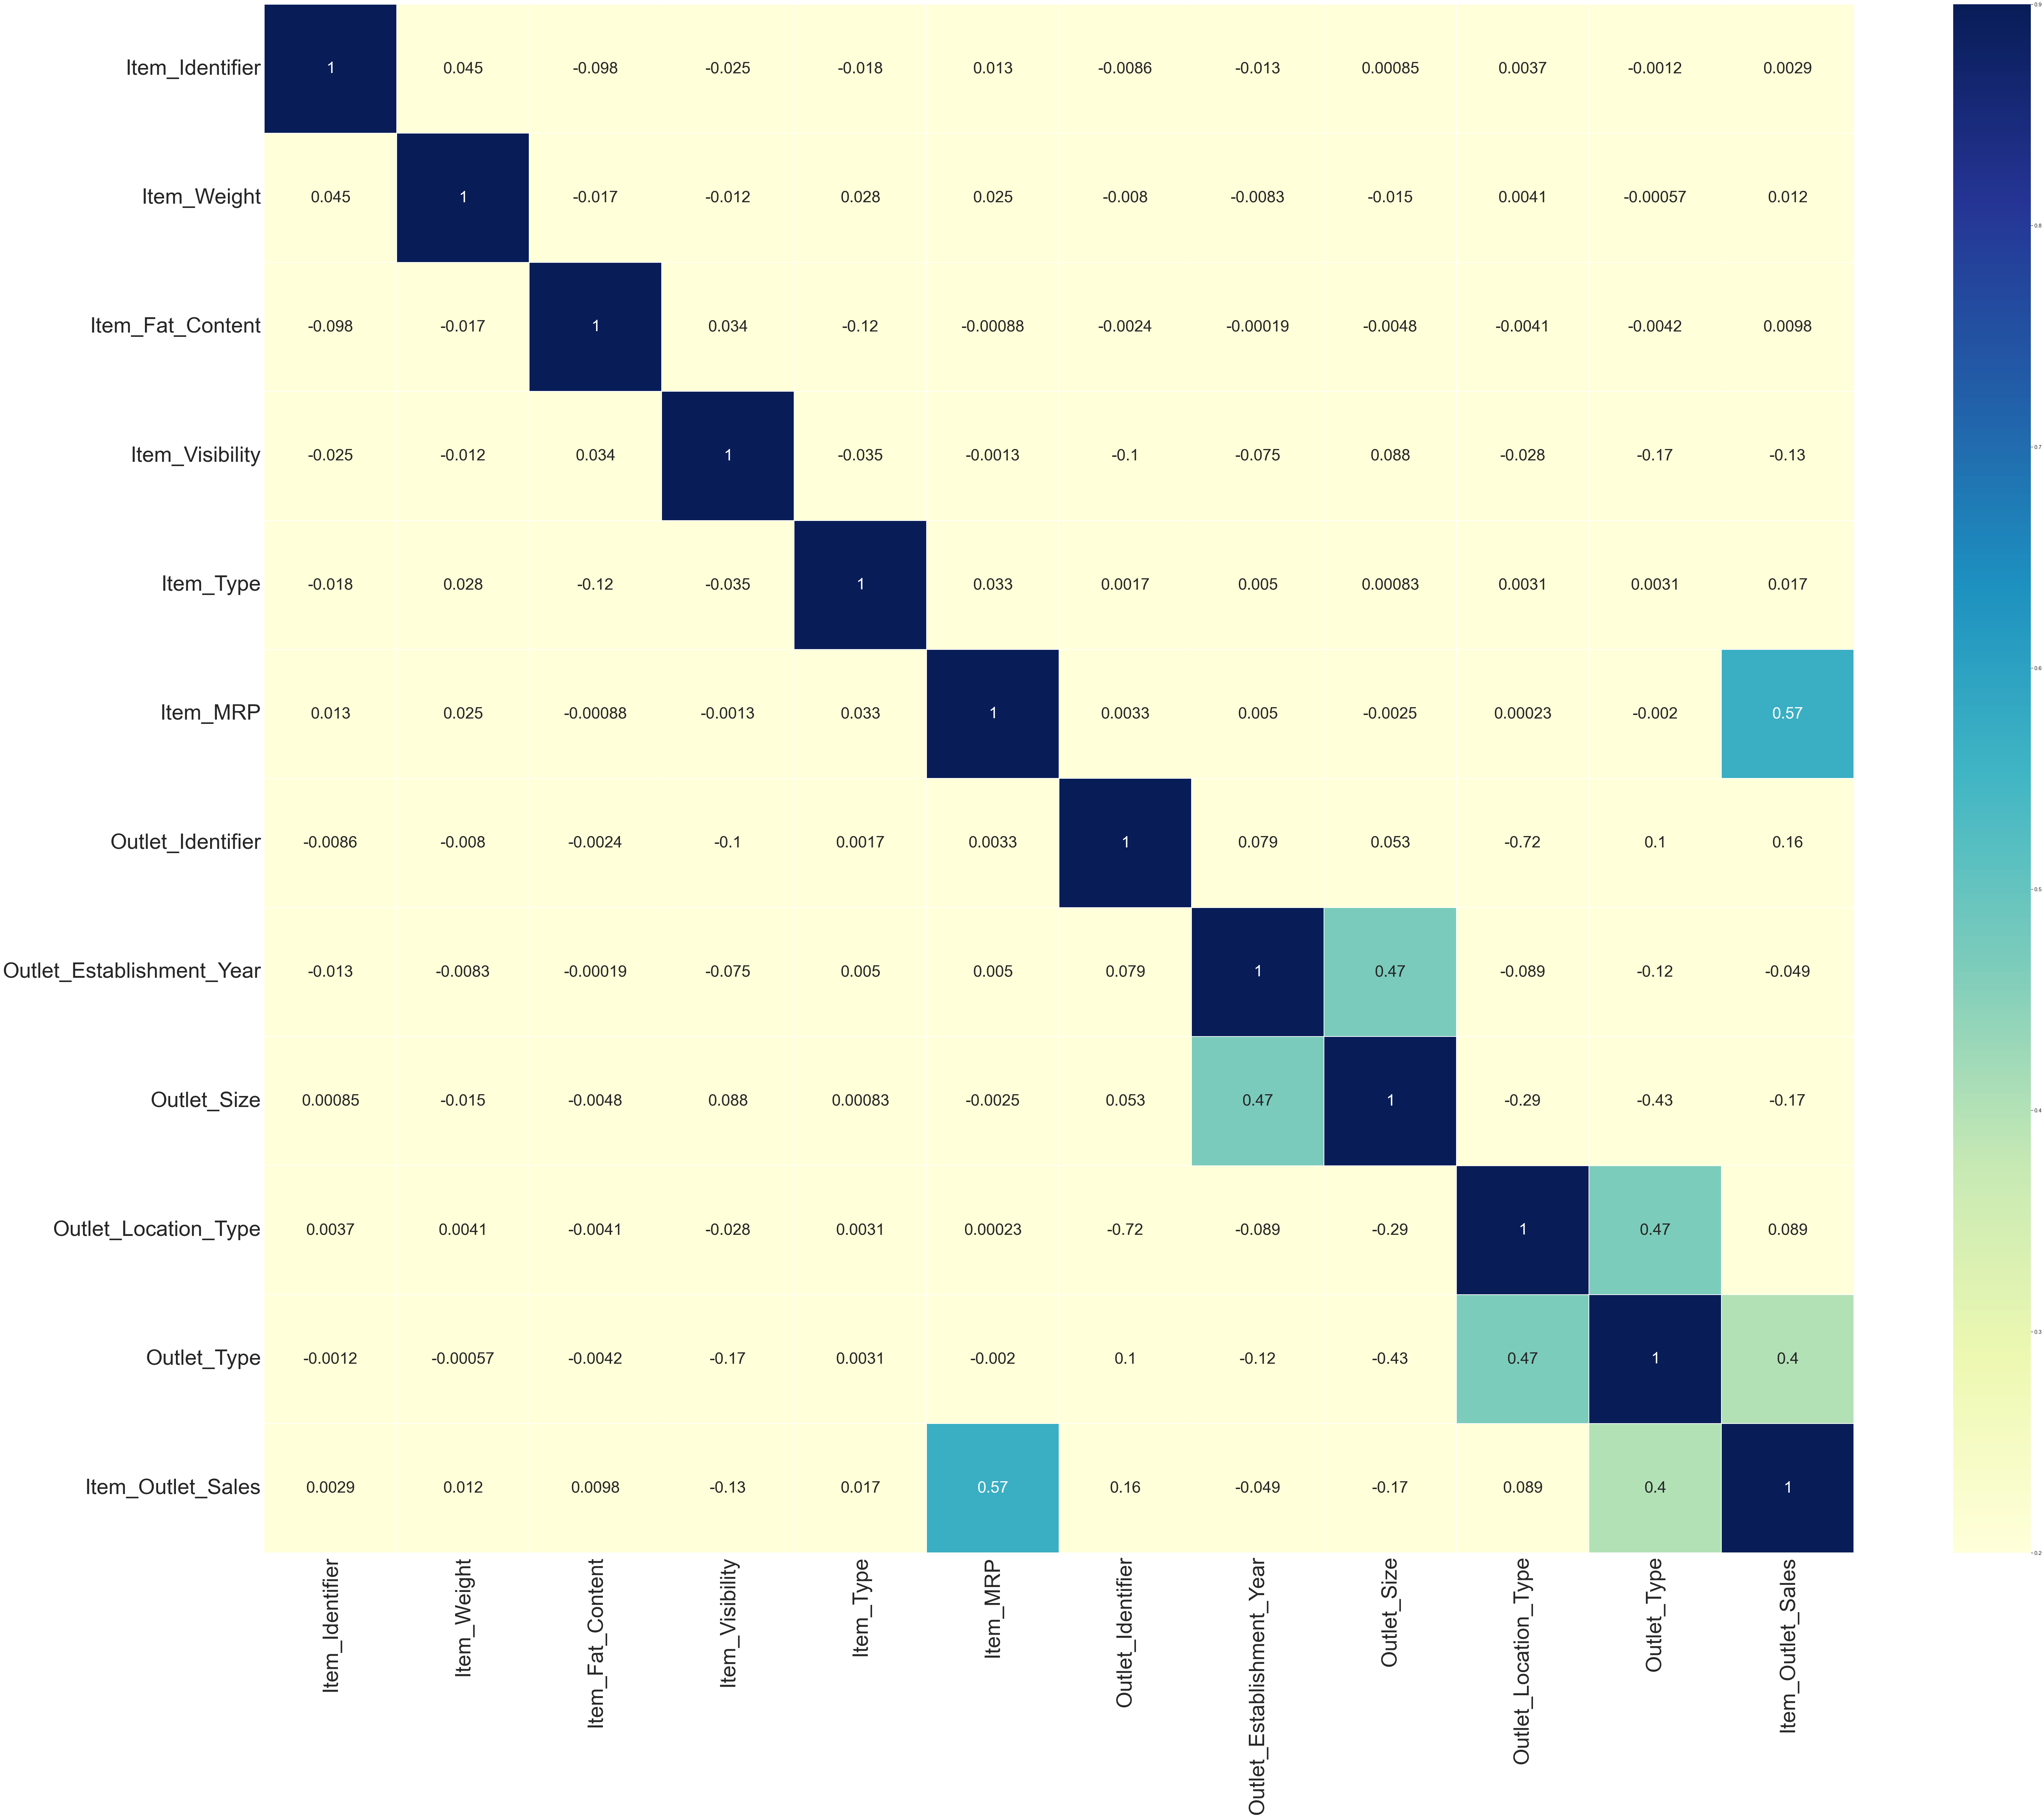

In [269]:
corrmatrix=df.corr()
plt.subplots(figsize=(100,80))
sns.set(font_scale=1.4)
heat=sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,annot_kws={'size': 45},linewidths=0.2,cmap='YlGnBu',cbar_kws={'orientation': 'vertical'})
plt.xticks(rotation=90)
plt.xticks(size=60)
plt.yticks(rotation=0)
plt.yticks(size=60)

In [300]:
df_test = pd.read_csv('test_AbJTz2l.csv')
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


Linear Regression

In [271]:
req_cols1 = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
X=df_new.drop(pd.DataFrame(df[req_cols1]),axis=1)
y=pd.DataFrame(df_new[req_cols1])
#y=df_new['Item_Outlet_Sales']

In [272]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
#X_scale = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)
y_scale = pd.DataFrame(scalar.fit_transform(y), columns=y.columns)


In [273]:
tw = pd.DataFrame(scalar.inverse_transform(y_scale))

In [274]:
tw

,0,1,2
0,156.0,9.0,3735.1380
1,8.0,3.0,443.4228
2,662.0,9.0,2097.2700
3,1121.0,0.0,732.3800
4,1297.0,1.0,994.7052
...,...,...,...
8518,370.0,1.0,2778.3834
8519,897.0,7.0,549.2850
8520,1357.0,6.0,1193.1136
8521,681.0,3.0,1845.5976


In [275]:
from sklearn.model_selection import train_test_split

In [276]:
X_test,X_train,y_test,y_train = train_test_split(X,y_scale,test_size=0.2,random_state=42)

In [277]:
y

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,156,9,3735.1380
1,8,3,443.4228
2,662,9,2097.2700
3,1121,0,732.3800
4,1297,1,994.7052
...,...,...,...
8518,370,1,2778.3834
8519,897,7,549.2850
8520,1357,6,1193.1136
8521,681,3,1845.5976


In [278]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)
lr_pred = pd.DataFrame(lr_model.predict(X_test),columns=y.columns)
#lr_pred = lr_model.predict(X_test)

In [279]:
#y_lr_pred =lr_pred.reshape(6818,-1)

In [280]:
#y_lr_pred = scalar.fit_transform(y_lr_pred)

In [281]:
lr_pred

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,-0.077373,1.260204,0.347415
1,0.074112,0.031877,0.197678
2,-0.207011,1.198685,-0.197458
3,-0.031366,0.045528,-0.976617
4,-0.082934,1.148132,0.125674
...,...,...,...
6813,-0.174526,-2.056677,-1.019023
6814,-0.043667,0.030888,-0.700586
6815,0.172268,0.048936,0.824044
6816,-0.287298,0.107292,-0.266859


In [282]:
y_test

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
549,0.717471,1.507813,0.120100
7757,1.207235,0.802852,0.540712
764,0.866626,1.155333,-0.618898
6867,0.020671,0.802852,-1.111693
2716,-0.050568,1.155333,1.197382
...,...,...,...
5734,0.873305,-1.664513,-1.113644
5191,-1.150310,-0.959551,-0.515501
5390,1.523355,0.802852,2.323046
860,-0.380045,-0.959551,-0.311437


In [283]:
from sklearn.metrics import mean_squared_error

In [284]:
print("Mean Squared Error is : ",mean_squared_error(y_test,lr_pred))

Mean Squared Error is :  0.584326859894643


In [285]:
lr_pred.columns

Index(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], dtype='object')

In [286]:
lr_pred.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,-0.077373,1.260204,0.347415
1,0.074112,0.031877,0.197678
2,-0.207011,1.198685,-0.197458
3,-0.031366,0.045528,-0.976617
4,-0.082934,1.148132,0.125674


In [301]:
lr_pred['Item_Identifier']=df_test['Item_Identifier']
lr_pred['Outlet_Identifier']=df_test['Outlet_Identifier']
lr_pred['Item_Outlet_Sales']=tw[2]
lrpred_new=lr_pred.loc[0: 5680]

In [302]:
lrpred_new

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,3735.1380
1,FDW14,OUT017,443.4228
2,NCN55,OUT010,2097.2700
3,FDQ58,OUT017,732.3800
4,FDY38,OUT027,994.7052
...,...,...,...
5676,FDB58,OUT046,4436.8912
5677,FDD47,OUT018,6088.0752
5678,NCO17,OUT045,2025.3636
5679,FDJ26,OUT017,2596.6200


In [303]:
from pathlib import Path  
filepath = Path('C:/downloads/submission.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

lrpred_new.to_csv(filepath,index=False)